In [15]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
from selenium import webdriver as wd

In [84]:
link2021='http://www.astrakhan.vybory.izbirkom.ru/region/region/astrakhan?action=show&root=1&tvd=23020001278674&vrn=23020001278670&region=30&global=&sub_region=0&prver=0&pronetvd=0&vibid=23020001278674&type=379'

In [253]:
chrdr = r'C:\Users\bendr\Documents\chrdr\chromedriver.exe'
wb = wd.Chrome(chrdr)

In [210]:
def parse(link):
    wb.get(link)
    soup = wb.page_source
    table = bs(soup).find('div',{'class':'row tab-pane active show'}).find('div',{'class':'table-wrapper'})
    new_df = []
    table = table.find_all('tr')
    for tr in table:
        row = []
        tds = tr.find_all('td')
        for td in tds:
            row.append(td.get_text())
        new_df.append(row[1:3])
        elections = pd.DataFrame(new_df).dropna().reset_index().drop('index',axis=1)
    return elections

In [211]:
elections21 = parse(link2021)
elections21

0  \
0               Число избирателей, внесенных в список   
1   Число бюллетеней, полученных участковой комиссией   
2   Число бюллетеней, выданных избирателям, прогол...   
3   Число избирательных бюллетеней, выданных избир...   
4   Число бюллетеней, выданных избирателям, прогол...   
5                         Число погашенных бюллетеней   
6   Число бюллетеней в переносных ящиках для голос...   
7   Число бюллетеней в стационарных ящиках для гол...   
8                   Число недействительных бюллетеней   
9                     Число действительных бюллетеней   
10                        Число утраченных бюллетеней   
11        Число бюллетеней, не учтенных при получении   
12                1. Политическая партия "НОВЫЕ ЛЮДИ"   
13  2. Политическая партия ЛДПР – Либерально-демок...   
14      3. ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ "РОДИНА"   
15  4. Политическая партия "КОММУНИСТИЧЕСКАЯ ПАРТИ...   
16  5. Всероссийская политическая партия "ЕДИНАЯ Р...   
17         6. Партия  СПРАВЕДЛИВАЯ РОССИЯ – ЗА ПРАВДУ   
18                              7. ПАРТИЯ ПЕНСИОНЕРОВ   

                                           1  
0                                 724813\n\n  
1                                 689446\n\n  
2                                      0\n\n  
3                                 257976\n\n  
4                                  51102\n\n  
5                                 380368\n\n  
6                                  50968\n\n  
7                                 257098\n\n  
8                                   7324\n\n  
9                                 300742\n\n  
10                                     0\n\n  
11                                     0\n\n  
12    18224\n5.92%\n\t\t\t\t\t\t\t\t\t\t\t\t  
13    16178\n5.25%\n\t\t\t\t\t\t\t\t\t\t\t\t  
14     5609\n1.82%\n\t\t\t\t\t\t\t\t\t\t\t\t  
15   56166\n18.23%\n\t\t\t\t\t\t\t\t\t\t\t\t  
16  144058\n46.76%\n\t\t\t\t\t\t\t\t\t\t\t\t  
17   50161\n16.28%\n\t\t\t\t\t\t\t\t\t\t\t\t  
18    10346\n3.36%\n\t\t\t\t\t\t\t\t\t\t\t\t

In [261]:
def correct(elections):
    for i in elections.columns.tolist()[1:]:
        foo = []
        for x in elections[i].tolist():
            fo = x
            if type(fo) != 'int':
                if '.' in fo and '\n' in fo:
                    ind = fo.find('\n')
                    fo = fo[:ind]
                while '\n' in fo:
                    fo = fo.replace('\n','')
                while '\t' in fo:
                    fo = fo.replace('\t','')
                fo = int(fo)
            foo.append(int(fo))
        elections[i] = foo
    return elections

In [213]:
elections21 = correct(elections21)
elections21

0       1
0               Число избирателей, внесенных в список  724813
1   Число бюллетеней, полученных участковой комиссией  689446
2   Число бюллетеней, выданных избирателям, прогол...       0
3   Число избирательных бюллетеней, выданных избир...  257976
4   Число бюллетеней, выданных избирателям, прогол...   51102
5                         Число погашенных бюллетеней  380368
6   Число бюллетеней в переносных ящиках для голос...   50968
7   Число бюллетеней в стационарных ящиках для гол...  257098
8                   Число недействительных бюллетеней    7324
9                     Число действительных бюллетеней  300742
10                        Число утраченных бюллетеней       0
11        Число бюллетеней, не учтенных при получении       0
12                1. Политическая партия "НОВЫЕ ЛЮДИ"   18224
13  2. Политическая партия ЛДПР – Либерально-демок...   16178
14      3. ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ "РОДИНА"    5609
15  4. Политическая партия "КОММУНИСТИЧЕСКАЯ ПАРТИ...   56166
16  5. Всероссийская политическая партия "ЕДИНАЯ Р...  144058
17         6. Партия  СПРАВЕДЛИВАЯ РОССИЯ – ЗА ПРАВДУ   50161
18                              7. ПАРТИЯ ПЕНСИОНЕРОВ   10346

In [214]:
def turn_in(df):
    x = (df.iloc[2,1]+df.iloc[3,1]+df.iloc[4,1])/df.iloc[0,1]
    return x

In [215]:
turn_in(elections_2021)

0.42642447086351926

In [216]:
link2016 = 'http://www.astrakhan.vybory.izbirkom.ru/region/region/astrakhan?action=show&root=1&tvd=2302000783232&vrn=2302000783227&region=30&global=&sub_region=0&prver=0&pronetvd=0&vibid=2302000783232&type=379'
elections2016 = parse(link2016)
elections2016 = correct(elections2016)

In [217]:
link11 = 'http://www.astrakhan.vybory.izbirkom.ru/region/region/astrakhan?action=show&root=1&tvd=2302000342777&vrn=2302000342772&region=30&global=&sub_region=0&prver=0&pronetvd=0&vibid=2302000342777&type=379'
elections11 = correct(parse(link11))
elections11

0       1
0               Число избирателей, внесенных в списки  763226
1   Число бюллетеней, полученных участковыми комис...  735511
2   Число бюллетеней, выданных избирателям, прогол...     285
3   Число избирательных бюллетеней, выданных избир...  394846
4   Число бюллетеней, выданных избирателям, прогол...   30502
5                         Число погашенных бюллетеней  309878
6   Число бюллетеней в переносных ящиках для голос...   30781
7   Число бюллетеней в стационарных ящиках для гол...  394008
8                   Число недействительных бюллетеней    8999
9                     Число действительных бюллетеней  415790
10  Число открепительных удостоверений, полученных...   22838
11  Число открепительных удостоверений, выданных у...   20471
12  Число избирателей, проголосовавших по открепит...   15498
13      Число погашенных открепительных удостоверений    2367
14  Число открепительных удостоверений, выданных о...     848
15      Число утраченных открепительных удостоверений       0
16                        Число утраченных бюллетеней       0
17        Число бюллетеней, не учтенных при получении       0
18                            1.АРО "ПАТРИОТЫ РОССИИ"    6328
19                                         2.АРО ЛДПР   49142
20                                3.АРО РОДП "ЯБЛОКО"    5901
21  4.Астраханское региональное отделение Партии С...   67645
22                                   5.АОО п.п."КПРФ"   63577
23  6.Астраханское региональное отделение Партии "...  223197

In [135]:
for election in [elections11, elections2016, elections21]:
    print(round(turn_in(election), 2))

0.56
0.36
0.43


In [208]:
def edro(election):
    edro_index = 0
    for i in range(len(election[0].tolist())):
        if 'ЕДИНАЯ' in election.iloc[i,0] or 'Единая' in election.iloc[i,0] :
            edro_index = i
    result = election[1][edro_index]/election.iloc[9,1]
    return result

In [218]:
for election in [elections11, elections2016, elections21]:
    print(round(edro(election), 2))

0.54
0.44
0.48


In [240]:
def parse_terr(link):
    wb.get(link)
    soup = wb.page_source
    table = bs(soup).find('div',{'class':'row tab-pane active show'}).find('div',{'class':'table-wrapper'})
    new_df = []
    table = table.find_all('tr')
    for tr in table:
        row = []
        tds = tr.find_all('td')
        for td in tds:
            row.append(td.get_text())
        new_df.append(row[1:])
        elections = pd.DataFrame(new_df).dropna().reset_index().drop(['index'],axis=1)
    return elections

0       1      2      3   \
0               Число избирателей, внесенных в списки  763226  25700  23758   
1   Число бюллетеней, полученных участковыми комис...  735511  25650  23690   
2   Число бюллетеней, выданных избирателям, прогол...     285      0     63   
3   Число избирательных бюллетеней, выданных избир...  394846   9996  12693   
4   Число бюллетеней, выданных избирателям, прогол...   30502   1571    473   
5                         Число погашенных бюллетеней  309878  14083  10461   
6   Число бюллетеней в переносных ящиках для голос...   30781   1571    536   
7   Число бюллетеней в стационарных ящиках для гол...  394008   9994  12671   
8                   Число недействительных бюллетеней    8999    268    289   
9                     Число действительных бюллетеней  415790  11297  12918   
10  Число открепительных удостоверений, полученных...   22838    292    174   
11  Число открепительных удостоверений, выданных у...   20471    134    139   
12  Число избирателей, проголосовавших по открепит...   15498    134     93   
13      Число погашенных открепительных удостоверений    2367    158     35   
14  Число открепительных удостоверений, выданных о...     848      6     21   
15      Число утраченных открепительных удостоверений       0      0      0   
16                        Число утраченных бюллетеней       0      0      0   
17        Число бюллетеней, не учтенных при получении       0      0      0   
18                            1.АРО "ПАТРИОТЫ РОССИИ"    6328    292    172   
19                                         2.АРО ЛДПР   49142   1463   1712   
20                                3.АРО РОДП "ЯБЛОКО"    5901    142    205   
21  4.Астраханское региональное отделение Партии С...   67645   1488   3426   
22                                   5.АОО п.п."КПРФ"   63577   3969   3650   
23  6.Астраханское региональное отделение Партии "...  223197   3943   3753   

       4      5      6      7      8      9   ...     21     22     23     24  \
0   22844  30216  29060  27884  27486  30261  ...  24150  30872  24399  21080   
1   20158  29000  30380  28388  28340  30944  ...  21940  28185  21300  18300   
2      71    151      0      0      0      0  ...      0      0      0      0   
3   14215  13909  17307  12623  14189  14571  ...  12093  18793  16084  11620   
4     453   1115    950   2256   1134   1553  ...    415   1286    424    296   
5    5419  13825  12123  13509  13017  14820  ...   9432   8106   4792   6384   
6     523   1266    950   2256   1134   1553  ...    415   1286    424    296   
7   14077  13909  17309  12520  14101  14570  ...  12063  18796  16083  11612   
8     229    337    621    507    689    400  ...    308    357    410    174   
9   14371  14838  17638  14269  14546  15723  ...  12170  19725  16097  11734   
10    300    605    728    377   1200    422  ...    932    993    970   1033   
11    228    426    680    344   1075    352  ...    894    958    948    986   
12     94    719    293     69    678    292  ...    586    521   2165   1412   
13     72    179     48     33    125     70  ...     38     35     22     47   
14      3     20     21      1     20      8  ...     73     75     50     32   
15      0      0      0      0      0      0  ...      0      0      0      0   
16      0      0      0      0      0      0  ...      0      0      0      0   
17      0      0      0      0      0      0  ...      0      0      0      0   
18    400    243    381    189    249    268  ...    209    271    206     48   
19   3143   1838   1121    789    991   1103  ...   3269   2437   2218   3630   
20    218    128    160    100    104    133  ...    352    378    373     43   
21   3236   2132   3061   2959   1788   3070  ...   1972   2757   2456    595   
22   2812   2510   3558   2109   1485   2845  ...   1542   1596   1840   4705   
23   4562   7987   9357   8123   9929   8304  ...   4826  12286   9004   2713   

       25     26     27     28     29     30  
0 

In [263]:
for i,year in zip([link11, link2016, link2021],['2011','2016','2021']):
    correct(parse_terr(i)).to_excel(year+'.xlsx')

In [264]:
df16 = correct(parse_terr(link2016))

In [265]:
df16

0       1      2      3   \
0               Число избирателей, внесенных в списки  745361  23652  23339   
1   Число бюллетеней, полученных участковыми комис...  677497  23515  22970   
2   Число бюллетеней, выданных избирателям, прогол...       0      0      0   
3   Число избирательных бюллетеней, выданных избир...  252270   7215  10249   
4   Число бюллетеней, выданных избирателям, прогол...   15473    722    191   
5                         Число погашенных бюллетеней  409754  15578  12530   
6   Число бюллетеней в переносных ящиках для голос...   15472    722    191   
7   Число бюллетеней в стационарных ящиках для гол...  251494   7215  10246   
8                   Число недействительных бюллетеней    8697    273    310   
9                     Число действительных бюллетеней  258269   7664  10127   
10  Число открепительных удостоверений, полученных...   13121     96     95   
11  Число открепительных удостоверений, выданных у...   10838     49     47   
12  Число избирателей, проголосовавших по открепит...   11526     49     50   
13      Число погашенных открепительных удостоверений    2283     47     48   
14  Число открепительных удостоверений, выданных о...    3845      4      5   
15      Число утраченных открепительных удостоверений       0      0      0   
16                        Число утраченных бюллетеней       0      0      0   
17        Число бюллетеней, не учтенных при получении       0      0      0   
18  1. Всероссийская политическая партия "ЕДИНАЯ Р...  112954   2185   2724   
19  2. Политическая партия "КОММУНИСТИЧЕСКАЯ ПАРТИ...   46137   2999   2753   
20  3. Политическая партия ЛДПР - Либерально-демок...   35543   1360   1789   
21  4. Политическая партия "Российская объединенна...    3115     53    100   
22               5.  Политическая партия "Добрых дел"    3098     83    125   
23         6. Политическая партия СПРАВЕДЛИВАЯ РОССИЯ   57422    984   2636   

       4      5      6      7      8      9   ...     21     22     23     24  \
0   21585  26605  26734  27775  23623  29755  ...  26905  29210  23278  20996   
1   20850  26150  24995  26783  23250  29252  ...  21600  22807  22500  17300   
2       0      0      0      0      0      0  ...      0      0      0      0   
3   10946   7783   9880  11274   7400  10723  ...   9893  10637   8011   7548   
4     408    928    384   1291    500    876  ...    231    455    139    509   
5    9496  17439  14731  14218  15350  17653  ...  11476  11715  14350   9243   
6     407    928    384   1291    500    876  ...    231    455    139    509   
7   10936   7783   9880  11205   7323  10723  ...   9583  10630   8008   7532   
8     275    311    440    517    136    414  ...    310    375    287    106   
9   11068   8400   9824  11979   7687  11185  ...   9504  10710   7860   7935   
10     99    461    501    474    563    292  ...    703    661    497    545   
11     67    454    335    343    361    193  ...    620    602    481    463   
12     30     69    302    254     66    116  ...   1034   1763    309    299   
13     32      7    166    131    202     99  ...     83     59     16     82   
14      1     39     44     15     93     57  ...    345    236    298    137   
15      0      0      0      0      0      0  ...      0      0      0      0   
16      0      0      0      0      0      0  ...      0      0      0      0   
17      0      0      0      0      0      0  ...      0      0      0      0   
18   4713   3722   4490   6276   5159   5897  ...   3390   4877   2671   4829   
19   1729   2032   2372   1892    933   1856  ...   1304   1257   1129    677   
20   3007   1431   1224   1031    515   1118  ...   1254   1185   1085    534   
21    114     92     79     67     48     76  ...    185    128    117     77   
22    156     96     92     71     47     75  ...    189    150    132     59   
23   1349   1027   1567   2642    985   2163  ...   3182   3113   2726   1759   

       25     26     27     28     29     30  
0 

In [270]:
df21 = correct(parse_terr(link2021))

In [271]:
df21

0       1      2      3   \
0               Число избирателей, внесенных в список  724813  39172  30250   
1   Число бюллетеней, полученных участковой комиссией  689446  38120  23020   
2   Число бюллетеней, выданных избирателям, прогол...       0      0      0   
3   Число избирательных бюллетеней, выданных избир...  257976  15753  12915   
4   Число бюллетеней, выданных избирателям, прогол...   51102   2036    252   
5                         Число погашенных бюллетеней  380368  20331   9853   
6   Число бюллетеней в переносных ящиках для голос...   50968   2034    252   
7   Число бюллетеней в стационарных ящиках для гол...  257098  15560  12877   
8                   Число недействительных бюллетеней    7324    501    513   
9                     Число действительных бюллетеней  300742  17093  12616   
10                        Число утраченных бюллетеней       0      0      0   
11        Число бюллетеней, не учтенных при получении       0      0      0   
12                1. Политическая партия "НОВЫЕ ЛЮДИ"   18224   1126    969   
13  2. Политическая партия ЛДПР – Либерально-демок...   16178   2185   1250   
14      3. ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ "РОДИНА"    5609    477    286   
15  4. Политическая партия "КОММУНИСТИЧЕСКАЯ ПАРТИ...   56166   4594   3687   
16  5. Всероссийская политическая партия "ЕДИНАЯ Р...  144058   5825   3259   
17         6. Партия  СПРАВЕДЛИВАЯ РОССИЯ – ЗА ПРАВДУ   50161   2103   2374   
18                              7. ПАРТИЯ ПЕНСИОНЕРОВ   10346    783    791   

       4      5      6      7      8      9   ...     14     15     16     17  \
0   29411  27923  33095  38608  34478  27736  ...  33151  36011  32744  34193   
1   28450  24603  33626  38780  35144  28503  ...  30700  33733  28750  31164   
2       0      0      0      0      0      0  ...      0      0      0      0   
3   12859  12470  11733  11720  11452  10888  ...   8633  10914  11810  12719   
4    4541   2064   1882   4696   7424   4768  ...    710   1234   1508   1034   
5   11050  10069  20011  22364  16268  12847  ...  21357  21585  15432  17411   
6    4541   2064   1882   4677   7423   4768  ...    710   1233   1405   1034   
7   12857  12446  11724  11687  11434  10887  ...   8612  10797  11710  12654   
8     300    399    521    277    406    243  ...    216    416    193    324   
9   17098  14111  13085  16087  18451  15412  ...   9106  11614  12922  13364   
10      0      0      0      0      0      0  ...      0      0      0      0   
11      0      0      0      0      0      0  ...      0      0      0      0   
12    994    808    604    889   1390    552  ...    691   1316    754    881   
13    796    519    523    552    720    771  ...    388    638    531    463   
14    320    224    329    457    289    153  ...    175    257    275    241   
15   2387   2885   2930   3187   3057   1859  ...   1831   2181   1803   1988   
16  10686   7417   4689   9047  10738   7114  ...   4044   3386   5084   7134   
17   1257   1851   3106   1630   1639   4546  ...   1676   3258   4101   2317   
18    658    407    904    325    618    417  ...    301    578    374    340   

       18     19     20     21     22     23  
0   30928  36099  34859  30546  35540  30231  
1   28550  33698  31130  28900  32836  29600  
2       0      0      0      0      0      0  
3   10299  11051  10327  10275  12874  11750  
4     457    803    741   1775   1494   2352  
5   17794  21844  20062  16850  18468  15498  
6     457    803    741   1775   1494   2352  
7   10273  11023  10287  10261  12793  11747  
8     231    401    322    125    305    262  
9   10499  11425  10706  11911  13982  13837  
10      0      0      0      0      0      0  
11      0      0      0      0      0      0  
12    747   1163    807    384    535    329  
13    349    677    599    396    425    314  
14    166    371    215    124    175    129  
15   1500   2327   2031   1153   1472   3510  
16   3701   3855   5067   8417   8103   8201  
17 

In [272]:
total_er = df16[1][18]
er2016 = df16.iloc[18,2:].reset_index()[18]
er2021 = df21.iloc[16,2:].reset_index()[16]

In [277]:
poi = (er2021-er2016[:22])/total_er
poi

0      0.0322255
1     0.00473644
2      0.0528799
3      0.0327124
4     0.00176178
5      0.0245321
6      0.0493918
7      0.0107743
8      0.0200613
9      0.0151389
10     0.0467181
11   -0.00951715
12   -0.00221329
13     0.0112701
14     0.0184323
15     0.0331728
16     0.0132886
17    0.00904793
18     0.0181667
19     0.0445048
20     0.0285603
21      0.048958
dtype: object

In [281]:
wb.get('https://astrakhan.er.ru/activity/news?date_start=2021-05-01&date_end=2021-09-17&page=12')


In [313]:
ER_news = bs(wb.page_source)
all_news = ER_news.find_all('div', {'class':'title title__news-item'})
all_news = [div.get_text() for div in all_news]
text = '; '.join(all_news)

In [294]:
# !pip install WordCloud

In [302]:
from wordcloud import WordCloud
from stop_words import get_stop_words

In [301]:
# !pip install stop_wordsи

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32921 sha256=054e5924f5f64ab44620b8d6681168f13670a042c87bd36dd7d839f1409d2c85
  Stored in directory: c:\users\bendr\appdata\local\pip\cache\wheels\eb\03\0d\3bd31c983789aeb0b4d5e2ca48590288d9db1586cf5f225062
Successfully built stop-words


In [310]:
STOPWORDS_RU = get_stop_words('russian')

In [314]:
import matplotlib.pyplot as plt
%matplotlib inline

# Функция для визуализации облака слов
def plot_cloud(wordcloud):
    # Устанавливаем размер картинки
    plt.figure(figsize=(40, 30))
    # Показать изображение
    plt.imshow(wordcloud) 
    # Без подписей на осях
    plt.axis("off")

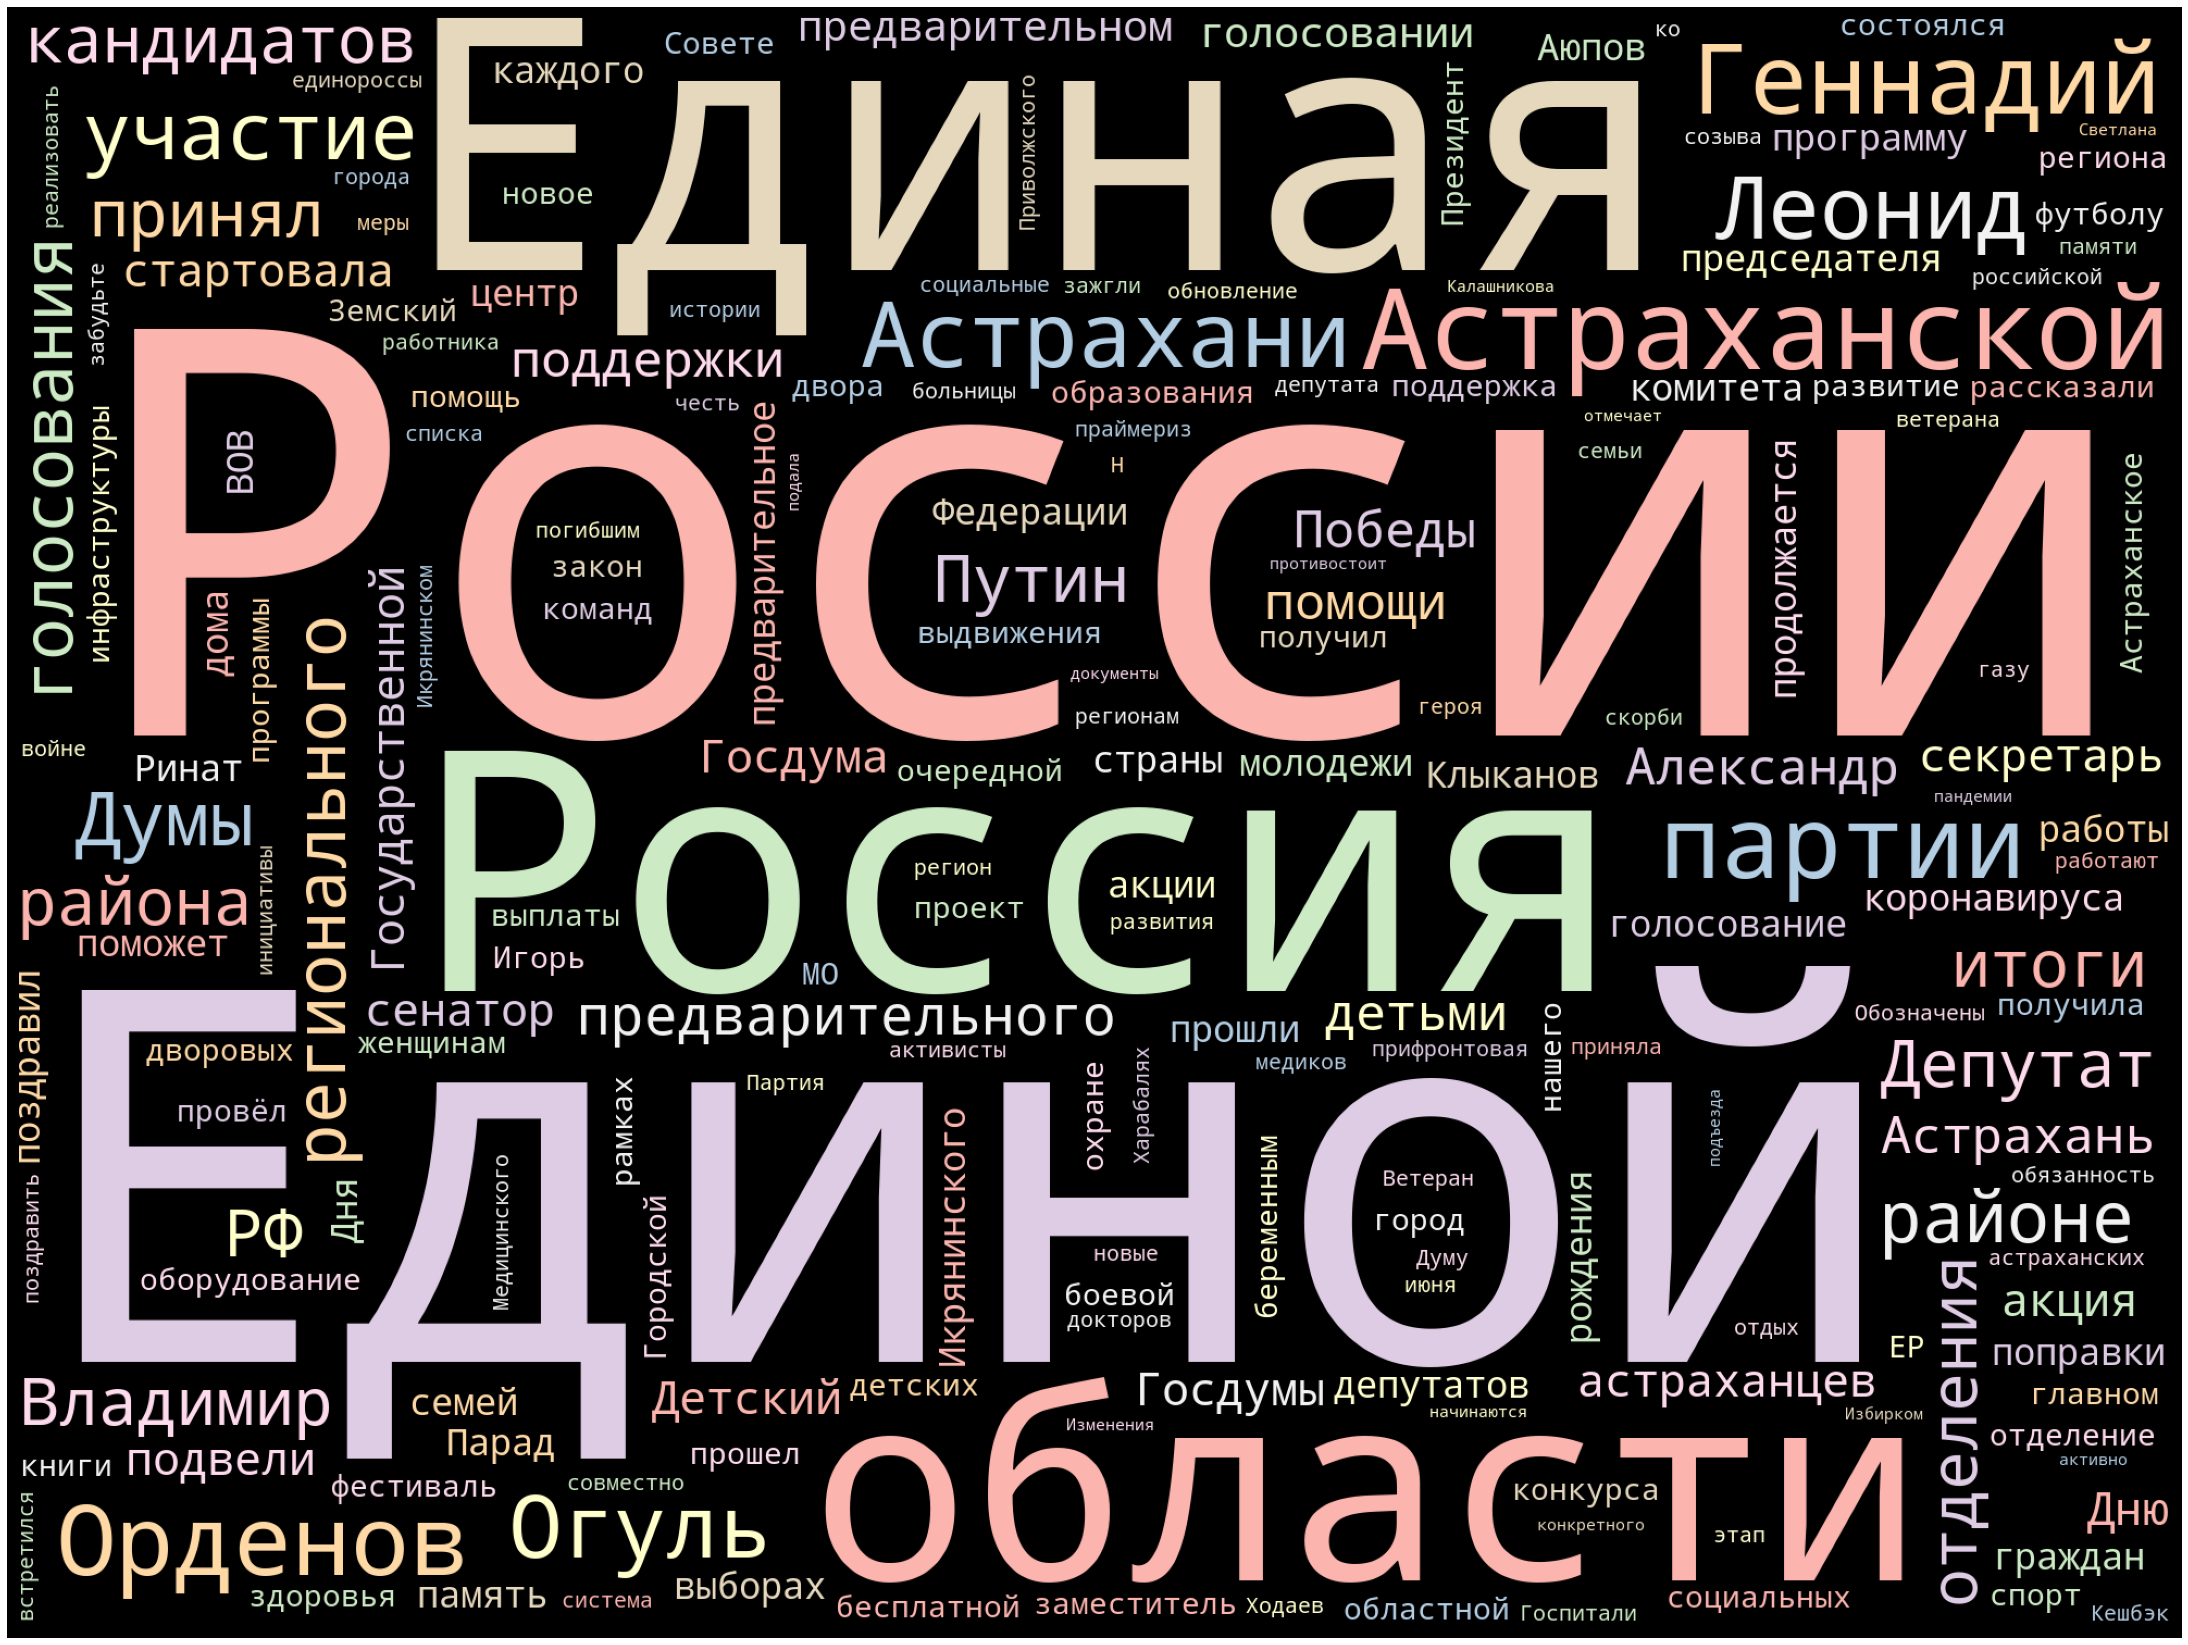

In [315]:
wordcloud = WordCloud(width = 2000, 
                      height = 1500, 
                      random_state=1, 
                      background_color='black', 
                      margin=20, 
                      colormap='Pastel1', 
                      collocations=False, 
                      stopwords = STOPWORDS_RU).generate(text)

# Рисуем картинку
plot_cloud(wordcloud)

In [327]:
news = []
for i in ['10','20']:
    links = []
    page1 = bs(requests.get(f'http://kprfast.ru/news/partynews.html?start={i}').text).find_all('article')
    for article in page1:
        page2 = bs(requests.get('http://kprfast.ru/'+article.find('a')['href']).text).find('div',{'itemprop':'articleBody'}).get_text()
        news.append(page2)

['\n23 октября состоялся III (октябрьский) совместный Пленум ЦК и ЦКРК КПРФ. В перерыве партийного форума прошел брифинг для журналистов. В нем приняли участие представители Компартии и лево-патриотических сил России во главе с Председателем ЦК КПРФ Г.А. Зюгановым.\nЗатем слово для выступления было предоставлено Г.А. Зюганову.\n* * *\nЛидер коммунистов подчеркнул, что сегодня на Пленуме демонстрируется новое качество объединения левых и народно-патриотических сил. «Выступая на выборах, мы показали, что у нас есть реальная программа, сплоченность, есть талантливые люди, - отметил Геннадий Андреевич. - Мы представили полноценный бюджет развития в 33 триллиона рублей и ряд законов, позволяющих его сформировать. И у нас есть политическая воля для реализации своей программы».\n«Если бы были честные выборы, мы давно бы победили, - продолжил Г.А. Зюганов. – Но даже в этих условиях в Москве мы показали равновеликий результат с «Единой Россией», примерно по 30%. После дистанта они накинули голо

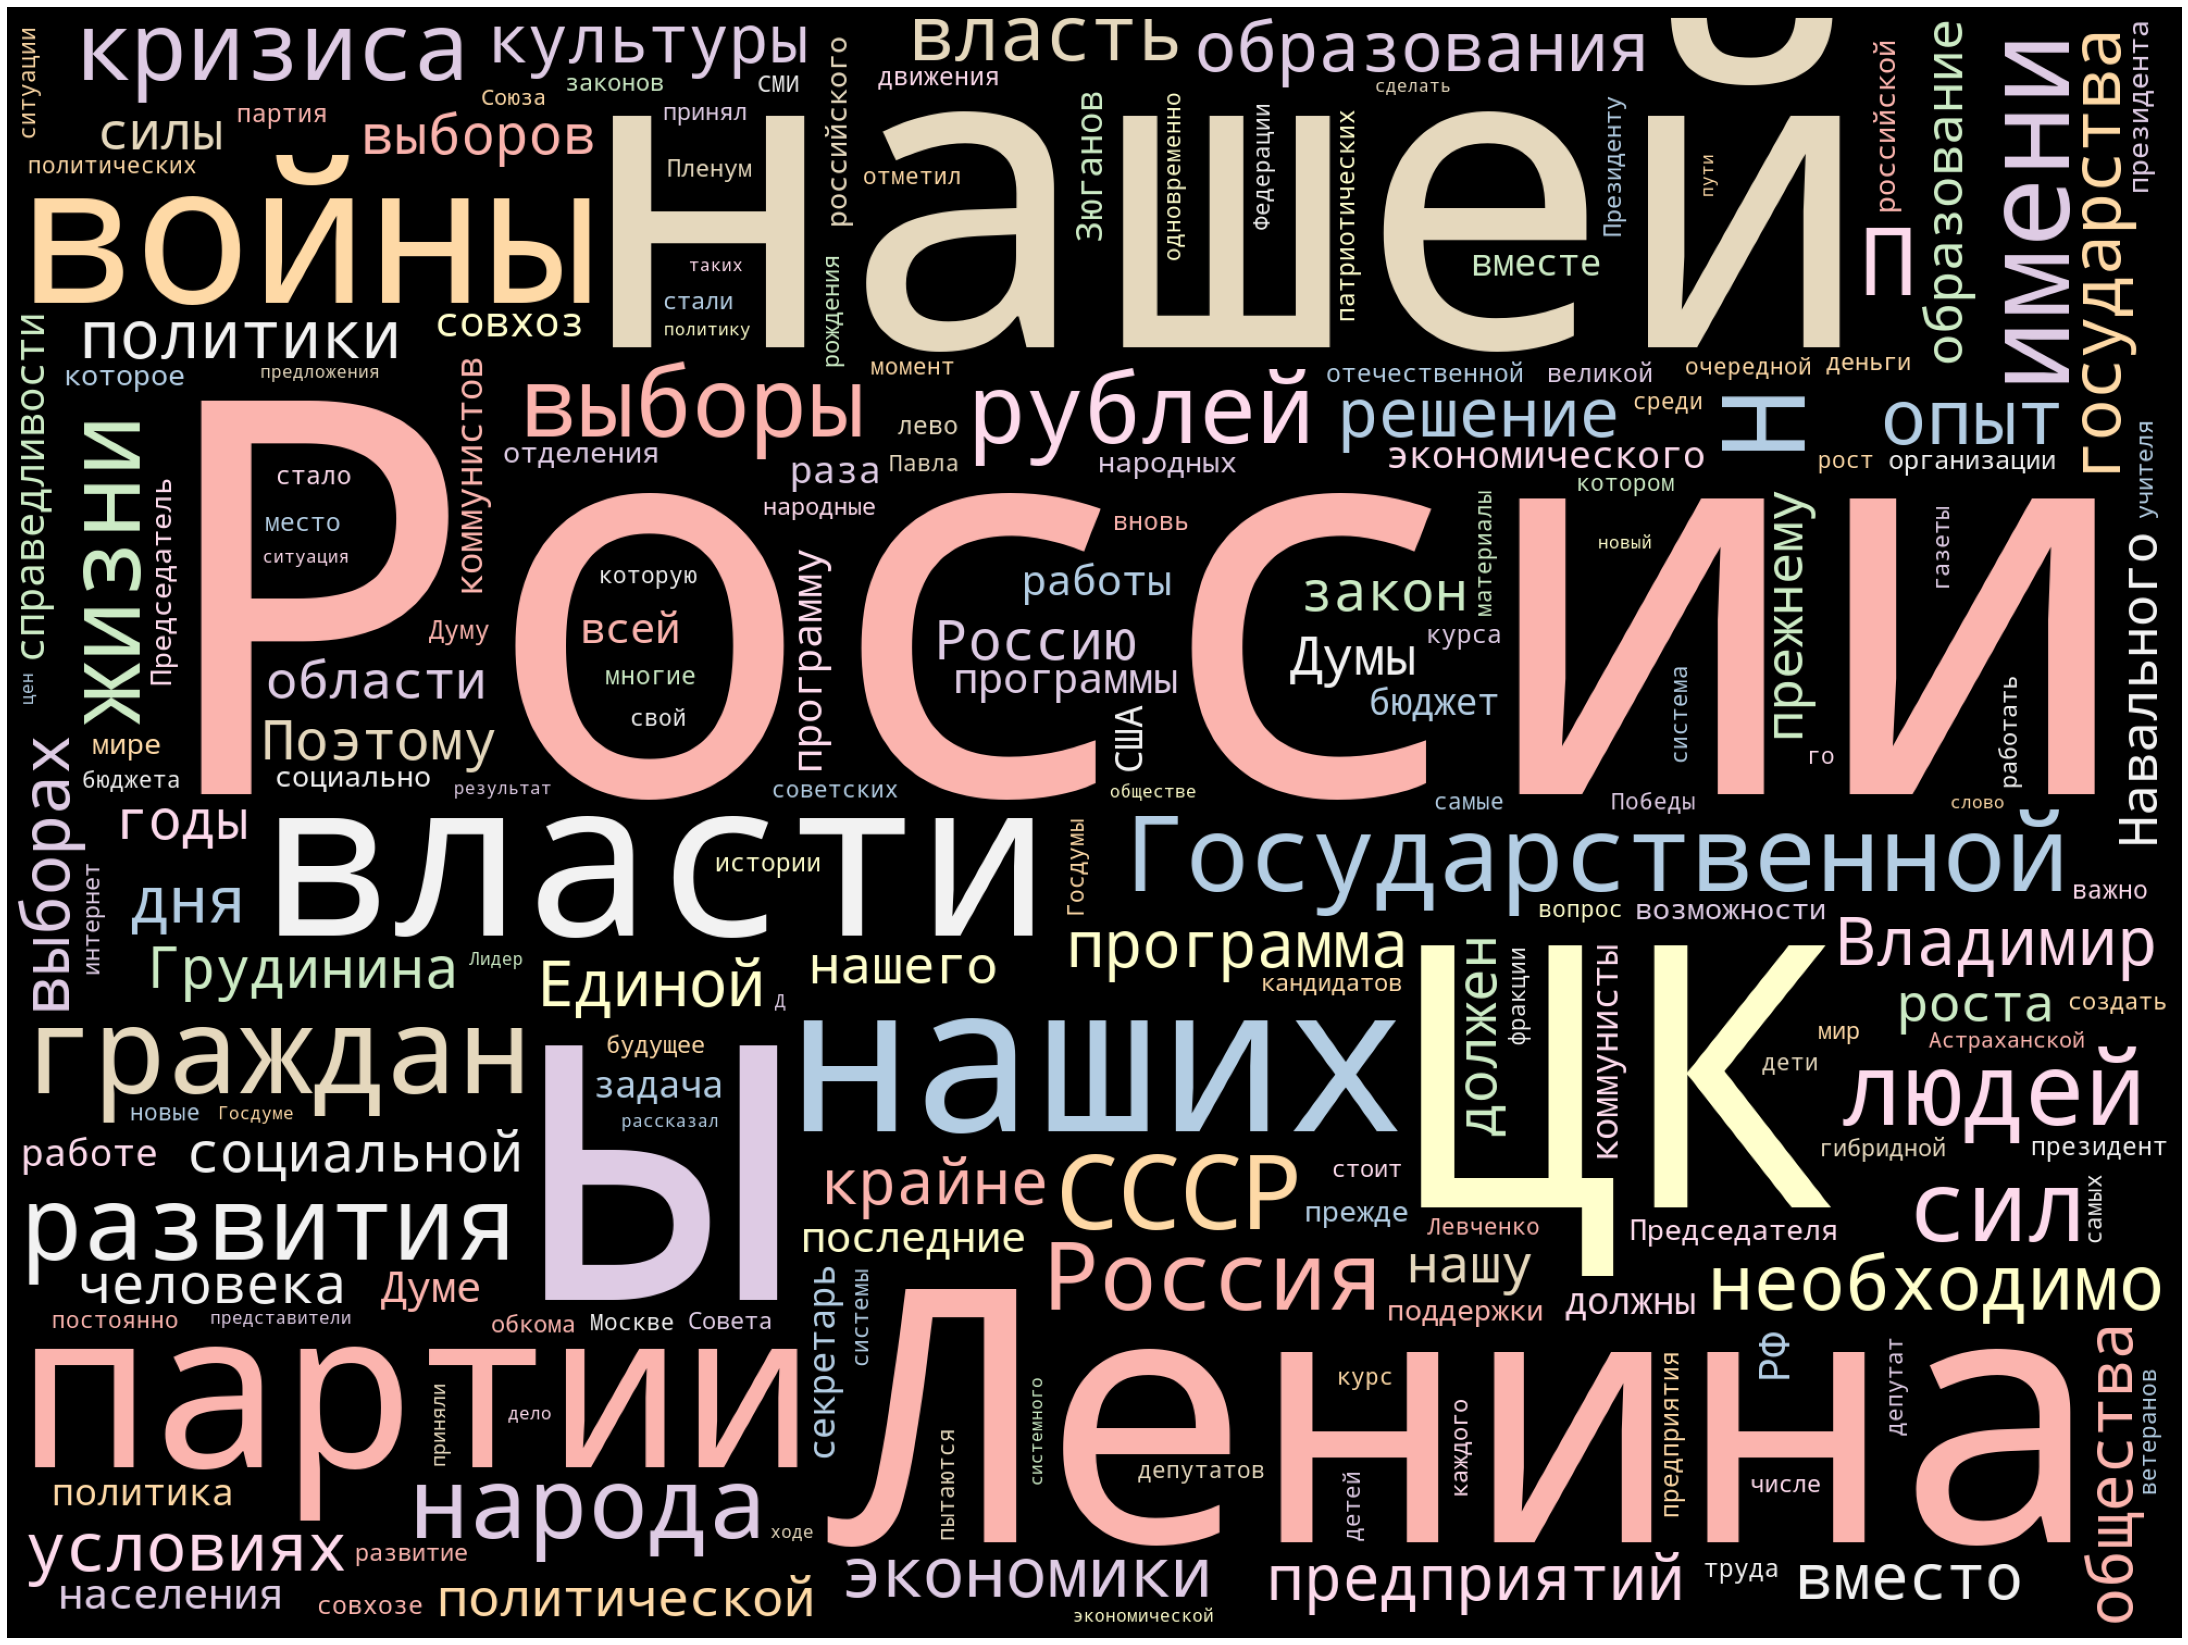

In [330]:
text1 = '; '.join(news).replace('КПРФ','').replace('стран','')
wordcloud = WordCloud(width = 2000, 
                      height = 1500, 
                      random_state=1, 
                      background_color='black', 
                      margin=20, 
                      colormap='Pastel1', 
                      collocations=False, 
                      stopwords = STOPWORDS_RU).generate(text1)

# Рисуем картинку
plot_cloud(wordcloud)

In [346]:
articles = []
for i in ['2','3','4']:
    links = []
    page = bs(requests.get(f'https://astrakhan.spravedlivo.ru/001105-998{i}.html').text).find_all('a',{'class':'newslist'})
    for art in page:
        link = art['href']
        links.append(link)
    links = tuple(links)
    for link in links:
        page2 = bs(requests.get(f'https://astrakhan.spravedlivo.ru/{link}').text).find('div',{'class':'df_body'}).get_text()
        articles.append(page2)

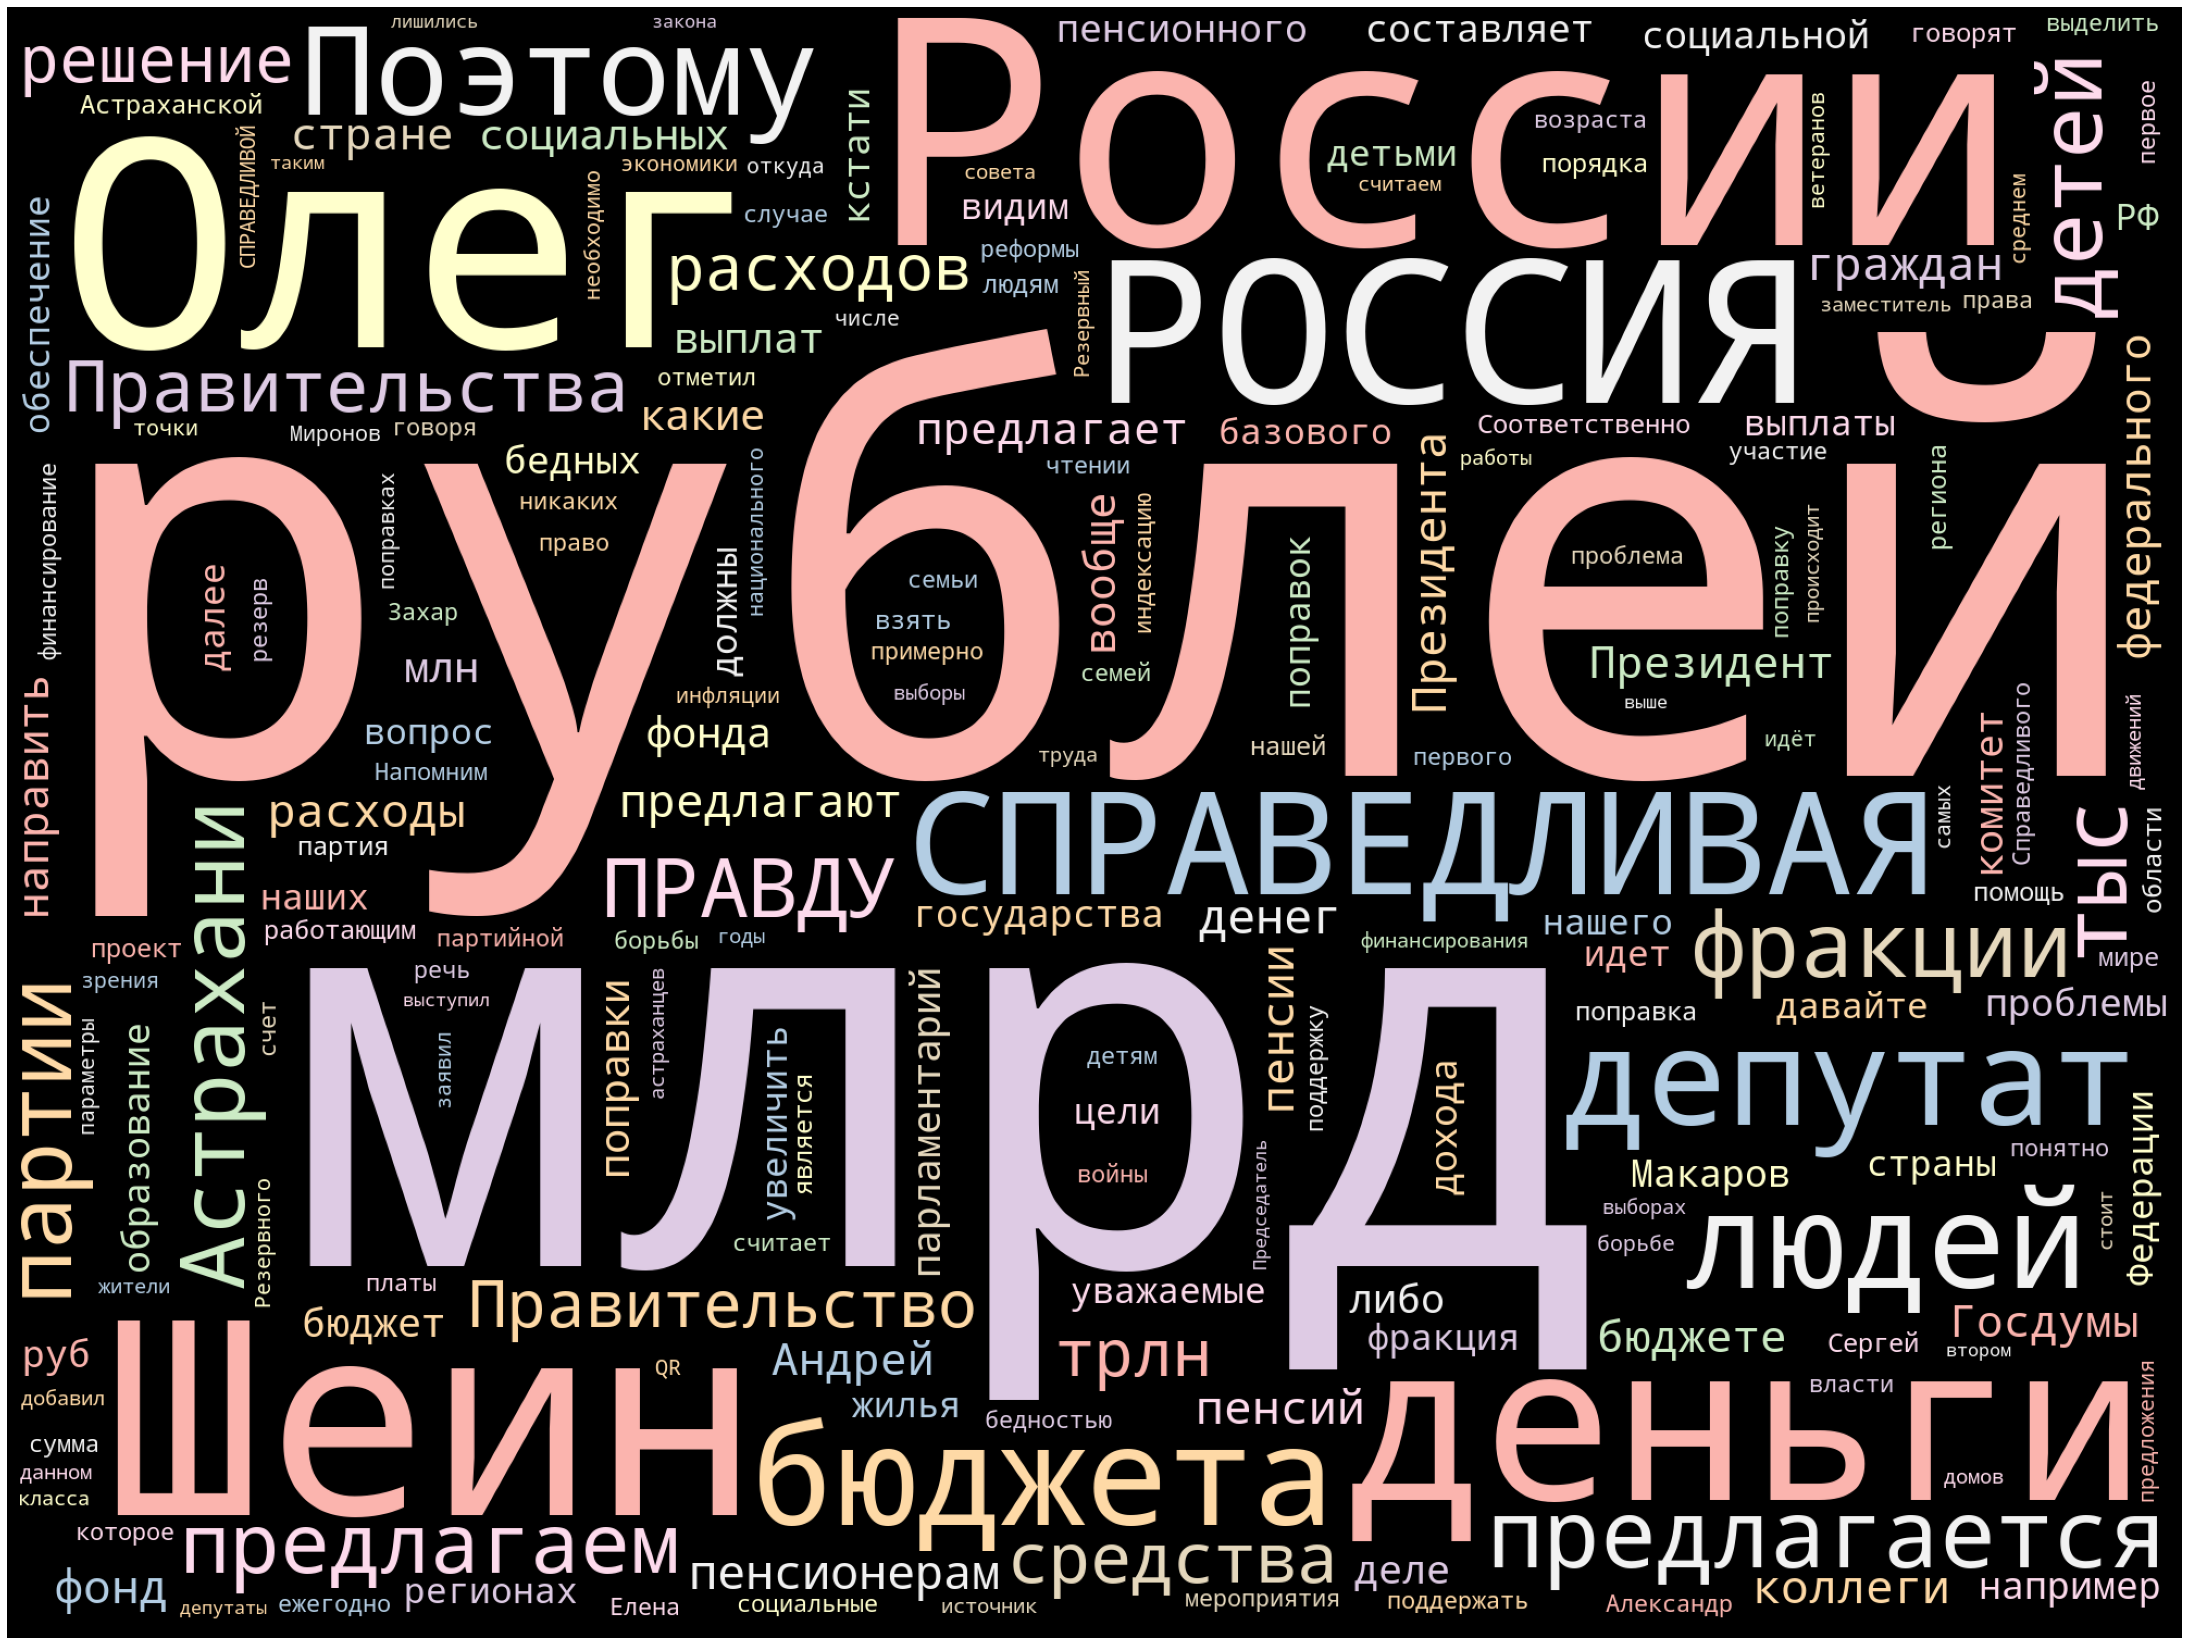

In [348]:
text3 = '; '.join(articles)
wordcloud = WordCloud(width = 2000, 
                      height = 1500, 
                      random_state=1, 
                      background_color='black', 
                      margin=20, 
                      colormap='Pastel1', 
                      collocations=False, 
                      stopwords = STOPWORDS_RU).generate(text3)

# Рисуем картинку
plot_cloud(wordcloud)

In [357]:
el21 = elections21.iloc[12:,:].sort_values(1, ascending=False)
sum21 = sum(el21[1])

In [360]:
el21

0       1
16  5. Всероссийская политическая партия "ЕДИНАЯ Р...  144058
15  4. Политическая партия "КОММУНИСТИЧЕСКАЯ ПАРТИ...   56166
17         6. Партия  СПРАВЕДЛИВАЯ РОССИЯ – ЗА ПРАВДУ   50161
12                1. Политическая партия "НОВЫЕ ЛЮДИ"   18224
13  2. Политическая партия ЛДПР – Либерально-демок...   16178
18                              7. ПАРТИЯ ПЕНСИОНЕРОВ   10346
14      3. ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ "РОДИНА"    5609

In [361]:
N21 = 1/sum(list(map(lambda x: (x/sum21)**2, el21[1])))
er21 = (el21[1][16]/sum21)**2
N_Mo21 = N21*(1-(er21)/sum(list(map(lambda x:(x/sum21)**2, el21[1]))))
N_Mo21

0.7853307098860499

In [364]:
el16 = elections2016.iloc[18:,:].sort_values(1, ascending=False)
sum16 = sum(el16[1])

In [366]:
N16 = 1/sum(list(map(lambda x: (x/sum16)**2, el16[1])))
er16 = (el16[1][18]/sum16)**2
N_Mo16 = N16*(1-(er16)/sum(list(map(lambda x:(x/sum16)**2, el16[1]))))
N_Mo16

1.1807759148557333

In [367]:
df161 = df16.iloc[18:,:].transpose()
totals = df161.iloc[[:,2],:]
for i in range(18,24):
    top = 2*sum()

16                                           17  \
0   Число утраченных бюллетеней  Число бюллетеней, не учтенных при получении   
1                             0                                            0   
2                             0                                            0   
3                             0                                            0   
4                             0                                            0   
5                             0                                            0   
6                             0                                            0   
7                             0                                            0   
8                             0                                            0   
9                             0                                            0   
10                            0                                            0   
11                            0                                            0   
12                            0                                            0   
13                            0                                            0   
14                            0                                            0   
15                            0                                            0   
16                            0                                            0   
17                            0                                            0   
18                            0                                            0   
19                            0                                            0   
20                            0                                            0   
21                            0                                            0   
22                            0                                            0   
23                            0                                            0   
24                            0                                            0   
25                            0                                            0   
26                            0                                            0   
27                            0                                            0   
28                            0                                            0   
29                            0                                            0   
30                            0                                            0   

                                                   18  \
0   1. Всероссийская политическая партия "ЕДИНАЯ Р...   
1                                              112954   
2                                                2185   
3                                                2724   
4                                                4713   
5                                                3722   
6                                                4490   
7                                                6276   
8                                                5159   
9                                                5897   
10                                               4455   
11                                               5661   
12                                               4928   
13                                               5069   
14                                               4294   
15                                               2113   
16                                               3002   
17                                               3387   
18                                               2200   
19                                               2833   
20                                               3015   
21                                               3390   
22                                               4877   
23                                               2671   
24                                         

In [372]:
df211 = df21.iloc[16,:].transpose()
df211 = df211.drop([0,1], axis=0).reset_index().drop('index', axis=1)

In [376]:
dftotals = df21.iloc[16:,:].transpose().sum(axis=1)
dftotals = dftotals.drop([0,1], axis=0).reset_index().drop('index', axis=1)

In [383]:
from scipy.spatial import distance

terr_share = df211/dftotals[0]
dist = [distance.euclidean(0.4676, state) for state in terr_share[16].tolist()]
terr_share['dist'] = dist
terr_share.sort_values('dist',ascending=False)

0   1   2   3   4   5   6   7   8   9  ...  13  14  15        16  17  18  \
6  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   1.38788 NaN NaN   
2  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   1.38116 NaN NaN   
10 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   1.31899 NaN NaN   
5  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   1.16932 NaN NaN   
19 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   1.08789 NaN NaN   
21 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   1.05997 NaN NaN   
20 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   1.04731 NaN NaN   
3  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN   0.95864 NaN NaN   
9  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.952695 NaN NaN   
15 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.922063 NaN NaN   
7  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.919478 NaN NaN   
8  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.868683 NaN NaN   
0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.752876 NaN NaN   
14 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.657102 NaN NaN   
18 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.654905 NaN NaN   
4  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.606049 NaN NaN   
12 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.522683 NaN NaN   
11 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.516221 NaN NaN   
1  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.421223 NaN NaN   
17 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.498255 NaN NaN   
13 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.437637 NaN NaN   
16 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN  0.478351 NaN NaN   

    19  20  21      dist  
6  NaN NaN NaN  0.920276  
2  NaN NaN NaN  0.913555  
10 NaN NaN NaN  0.851387  
5  NaN NaN NaN  0.701716  
19 NaN NaN NaN  0.620289  
21 NaN NaN NaN  0.592372  
20 NaN NaN NaN  0.579705  
3  NaN NaN NaN  0.491040  
9  NaN NaN NaN  0.485095  
15 NaN NaN NaN  0.454463  
7  NaN NaN NaN  0.451878  
8  NaN NaN NaN  0.401083  
0  NaN NaN NaN  0.285276  
14 NaN NaN NaN  0.189502  
18 NaN NaN NaN  0.187305  
4  NaN NaN NaN  0.138449  
12 NaN NaN NaN  0.055083  
11 NaN NaN NaN  0.048621  
1  NaN NaN NaN  0.046377  
17 NaN NaN NaN  0.030655  
13 NaN NaN NaN  0.029963  
16 NaN NaN NaN  0.010751  

[22 rows x 23 columns]

In [382]:
terr_share = df211/dftotals[0]
terr_share[16]

0     0.752876
1     0.421223
2      1.38116
3      0.95864
4     0.606049
5      1.16932
6      1.38788
7     0.919478
8     0.868683
9     0.952695
10     1.31899
11    0.516221
12    0.522683
13    0.437637
14    0.657102
15    0.922063
16    0.478351
17    0.498255
18    0.654905
19     1.08789
20     1.04731
21     1.05997
Name: 16, dtype: object